In [1]:
import sys
sys.path.append('../')
from icaviz.plotting import *
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import cm
import matplotlib
import scipy

from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.compare import *
from pymodulon.io import *


pd.options.display.max_columns = 999 

In [2]:
#format figures
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Also, if you want your axes lines to be true black, and not this weird dark gray:
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['ytick.color'] = 'black'

In [3]:
DATA_DIR = '../data/precise2/'
PRECISE_DIR = '../data/precise/'
GENE_DIR = '../data/annotation/'
gene_info = pd.read_csv(GENE_DIR+'gene_info.csv', index_col =0)

In [4]:
ica_data = load_json_model(DATA_DIR+'precise2.json.gz')

In [5]:
reg_disc_ims = ica_data.imodulon_table[
    ica_data.imodulon_table['annotation_category'] == 'Regulator Discovery'
].index
reg_disc_ims

Index(['YmfT', 'YgeV', 'YheO', 'YciT', 'YbaQ', 'PdeL'], dtype='object')

## Gene weight plots

In [8]:
import seaborn as sns
sns.set_style('ticks')

In [18]:
def altered_plot_genes(imodulon):
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

    fig,ax = plt.subplots(figsize=(4,3))

    plot_gene_weights(ica_data,imodulon, ax=ax)

    ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
    ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

    ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)
    ax.grid(False)

    ax.set_ylabel('{} iModulon Gene Weight'.format(imodulon),fontsize=10, fontweight ='bold')
    ax.set_xlabel('Gene Start',fontsize=10, fontweight ='bold')

#     labels = ['','Amino acid\ntransport and\nmetabolism', 'Energy production\nand conversion',
#              'Nucleotide transport\nand metabolism', 
#              'Post-translational\nmodification, protein\nturnover,and chaperones',
#              'Transcription']

    plt.legend(bbox_to_anchor=(1,1),fontsize=9,ncol=1, markerscale=1.3, handletextpad=.1,
              frameon=False, labelspacing=.8)

    plt.savefig('./fig4/{}_genes.pdf'.format(imodulon), dpi = 600, bbox_inches = 'tight')

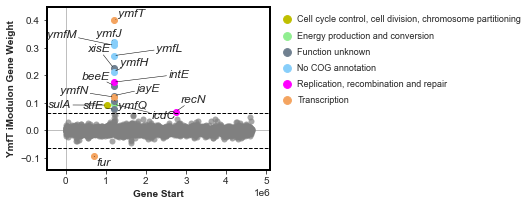

In [19]:
altered_plot_genes('YmfT')

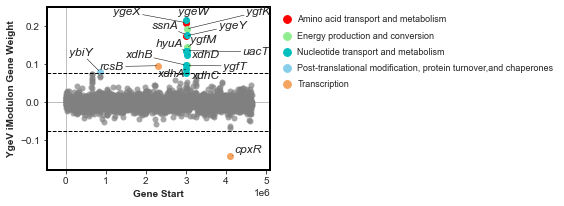

In [20]:
altered_plot_genes('YgeV')

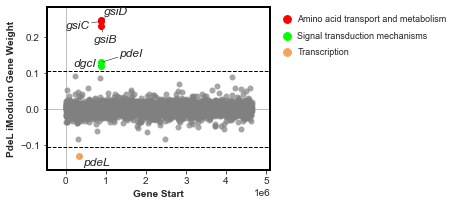

In [21]:
altered_plot_genes('PdeL')

In [32]:
e14_genes = ['b11'+str(x) for x in range(37,60)]
e14_excision = ica_data.view_imodulon('e14 Removal').index
ymfT_genes = ica_data.view_imodulon('YmfT').index

In [33]:
from matplotlib_venn import venn3

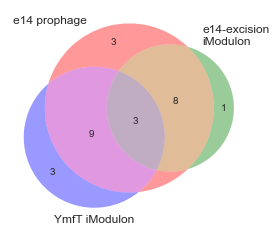

In [38]:
venn3((set(e14_genes),set(e14_excision),set(ymfT_genes)),set_labels=['e14 prophage','e14-excision\niModulon','YmfT iModulon'])
plt.savefig('./fig4/e14_venn.pdf', dpi = 600, bbox_inches = 'tight')

## Activity plots

### ygeV activities

In [39]:
ygeV_A_df = ica_data.A[ica_data.A.index == 'YgeV']
ygeV_A_df.columns = ica_data.sample_table.full_name

conditions = ['tcs:del_baeR_lb', 'tcs:del_baeR_etoh', 'tcs:del_cpxR_lb', 'tcs:del_cpxR_etoh',
             'tcs:wt_lb', 'tcs:wt_etoh']

ygeV_A_TCS_df = ygeV_A_df[conditions].T
ygeV_pivot = ygeV_A_TCS_df.reset_index().pivot_table(columns=["full_name"])[conditions].T

ygeV_pivot

,YgeV
full_name,
tcs:del_baeR_lb,18.302464
tcs:del_baeR_etoh,27.397085
tcs:del_cpxR_lb,19.384365
tcs:del_cpxR_etoh,41.933244
tcs:wt_lb,7.762221
tcs:wt_etoh,9.612084


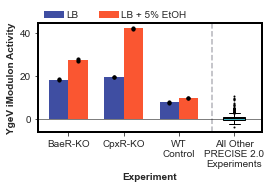

In [40]:
fig, ax1 = plt.subplots(figsize=(4,2))

# bar plot
labels = ['BaeR-KO', 'CpxR-KO', 'WT\nControl', 'All Other\nPRECISE 2.0\nExperiments']
LB = ygeV_pivot[ygeV_pivot.index.str.contains('_lb')].YgeV.to_list()+[0]
Ethanol = ygeV_pivot[ygeV_pivot.index.str.contains('_etoh')].YgeV.to_list()+[0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax1.bar(x - width/2, LB, width, label='LB', lw=0, color='#3F4EA2')
rects2 = ax1.bar(x + width/2, Ethanol, width, label='LB + 5% EtOH', lw=0, color = '#FA5631')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('YgeV iModulon Activity', fontsize=10, fontweight='bold')
ax1.set_xlabel('Experiment', fontsize=10, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(bbox_to_anchor=(0.7,1.2), frameon=False, ncol=2, 
           columnspacing=2, handletextpad=.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
autolabel(rects1)
autolabel(rects2)

#scatterpoints
scatter_x = []
for i in x[:-1]:
    scatter_x.extend([i-width/2]*2+ [i+width/2]*2)
ax1.scatter(scatter_x, ygeV_A_TCS_df.YgeV, color="k", zorder=2, s=10)


# boxplot
ax1.axvline(2.6, color='#B4B4BB', ls='--')
ax1.axhline(0, color='k', lw=0.5)
flierprops = dict(marker='o', markersize=1,
                  linestyle='none', markeredgecolor='k')
ax1.boxplot(ygeV_A_df.T[~ygeV_A_df.T.index.isin(conditions)].YgeV.to_list(), 
            positions=[3], flierprops=flierprops, widths=[.4], 
            patch_artist=True, boxprops= dict(facecolor='#3FB1BE'),
            medianprops=dict(color='k'))

ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# more formatting
ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)

plt.savefig('./fig4/YgeV_activity.pdf', dpi = 600, bbox_inches = 'tight')

### e-14 excision activities

In [51]:
excised = ica_data.A.loc['e14 Removal'][ica_data.A.loc['e14 Removal'] < -10].index
wt = ica_data.A.loc['e14 Removal'][ica_data.A.loc['e14 Removal'] > -10].index

In [76]:
df_e14 = ica_data.A.loc[['e14 Removal']].T
df_e14['e14 Excision'] = [x < -10 for x in df_e14['e14 Removal']]

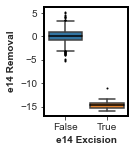

In [80]:
fig, ax1 = plt.subplots(figsize=(1.5,2))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('e14-excision iModulon Activity', fontsize=10, fontweight='bold')
ax1.set_xlabel('e14 Excision', fontsize=10, fontweight='bold')

flierprops = dict(marker='o', markersize=1,
                  linestyle='none', markeredgecolor='k')

sns.boxplot(data = df_e14,x='e14 Excision',y='e14 Removal',ax = ax1, flierprops=flierprops,
            medianprops=dict(color='k'))

# more formatting
ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)

plt.savefig('./fig4/e14_excision_activity.pdf', dpi = 600, bbox_inches = 'tight')

### YmfT activities

In [91]:
ymfT_A_df[conditions]

full_name,fur:wt_fe,fur:wt_fe,fur:delfur_fe2,fur:delfur_fe2,oxyR:wt_glc,oxyR:wt_glc,oxyR:wt_h2o2,oxyR:wt_h2o2
YmfT,1.020756,0.996837,9.048174,9.363118,0.87947,0.643683,12.775732,12.702789


In [95]:
ymfT_A_df = ica_data.A[ica_data.A.index == 'YmfT']
ymfT_A_df.columns = ica_data.sample_table.full_name

conditions = ['fur:wt_fe','fur:delfur_fe2','oxyR:wt_glc','oxyR:wt_h2o2']

ymfT_A_cond_df = ymfT_A_df[conditions].T
ymfT_pivot = ymfT_A_cond_df.reset_index().pivot_table(columns=["full_name"])[conditions].T

ymfT_pivot

,YmfT
full_name,
fur:wt_fe,1.008796
fur:delfur_fe2,9.205646
oxyR:wt_glc,0.761576
oxyR:wt_h2o2,12.739260


In [98]:
FUR

[1.008796279, 9.2056457283, 0]

In [99]:
x

array([0, 1, 2, 3, 4])

In [102]:
x - width/2

array([-0.175,  0.825,  1.825,  2.825,  3.825])

In [105]:
scatter_x

[-0.175,
 -0.175,
 0.175,
 0.175,
 0.825,
 0.825,
 1.175,
 1.175,
 1.825,
 1.825,
 2.175,
 2.175]

In [110]:
scatter_x, ymfT_A_cond_df.YmfT

([-0.175, -0.175, 0.825, 0.825, 1.825, 1.825],
 full_name
 fur:wt_fe          1.020756
 fur:wt_fe          0.996837
 fur:delfur_fe2     9.048174
 fur:delfur_fe2     9.363118
 oxyR:wt_glc        0.879470
 oxyR:wt_glc        0.643683
 oxyR:wt_h2o2      12.775732
 oxyR:wt_h2o2      12.702789
 Name: YmfT, dtype: float64)

No handles with labels found to put in legend.


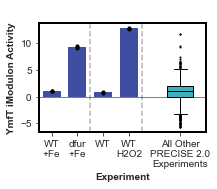

In [142]:
fig, ax1 = plt.subplots(figsize=(3,2))

# bar plot
labels = ['WT\n+Fe', 'dfur\n+Fe', 'WT','WT\nH2O2']

x = np.arange(len(labels))  # the label locations
width = 0.7  # the width of the bars

rects1 = ax1.bar(x, ymfT_pivot['YmfT'].values, width, label=None, lw=0, color='#3F4EA2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('YmfT iModulon Activity', fontsize=10, fontweight='bold')
ax1.set_xlabel('Experiment', fontsize=10, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(bbox_to_anchor=(0.7,1.2), frameon=False, ncol=2, 
           columnspacing=2, handletextpad=.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
autolabel(rects1)
autolabel(rects2)

#scatterpoints
scatter_x = []
for i in x:
    scatter_x.extend([i]*2)
ax1.scatter(scatter_x, ymfT_A_cond_df.YmfT, color="k", zorder=2, s=10)


# boxplot
ax1.axvline(3.5, color='#B4B4BB', ls='--')
ax1.axvline(1.5, color='#B4B4BB', ls='--')
ax1.axhline(0, color='k', lw=0.5)
flierprops = dict(marker='o', markersize=1,
                  linestyle='none', markeredgecolor='k')

ax1.boxplot(ymfT_A_df.T[~ymfT_A_df.T.index.isin(conditions)].YmfT.to_list(), 
            positions=[5], flierprops=flierprops, widths=[1], 
            patch_artist=True, boxprops= dict(facecolor='#3FB1BE'),
            medianprops=dict(color='k'))

ax1.set_xticks(list(range(4))+[5])
ax1.set_xticklabels(labels+['All Other\nPRECISE 2.0\nExperiments'])
ax1.set_xlim([-.5,6])

# more formatting
ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax1.spines['top'].set_linewidth(2); ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2); ax1.spines['right'].set_linewidth(2)

plt.savefig('./fig4/ymfT_activity.pdf', dpi = 600, bbox_inches = 'tight')

In [152]:
ica_data.imodulons_with('scpC')

[]

In [148]:
ica_data.view_imodulon('RcsC-related')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
b0220,0.172738,ivy,NaN,240343,240816,+,periplasmic chaperone%2C inhibitor of vertebra...,"Post-translational modification, protein turno...",P0AD59,"ppGpp,Nac"
b0379,0.285682,yaiY,NaN,399025,399333,-,inner membrane protein,Function unknown,P0AAP7,"Lrp,Nac"
b0412,0.104004,yajI,NaN,432312,432851,-,putative lipoprotein YajI,Cell wall/membrane/envelope biogenesis,P46122,YfeC
b0439,0.052105,lon,NaN,458888,461242,+,Lon protease,"Post-translational modification, protein turno...",P0A9M0,"RpoD,RpoE,RpoH,gcvB,GadX"
b0608,0.060223,ybdR,NaN,642088,643326,+,putative Zn(2(+))-dependent alcohol dehydrogen...,Amino acid transport and metabolism,P77316,Nac
b0753,0.046437,ybgS,NaN,784937,785317,-,PF13985 family protein YbgS,Function unknown,P0AAV6,"ppGpp,Lrp"
b1110,0.260171,ycfJ,NaN,1167599,1168138,+,PF05433 family protein YcfJ,Function unknown,P0AB35,Lrp
b1171,0.152357,ymgD,NaN,1222305,1222634,-,PF16456 family protein YmgD,Function unknown,P0AB46,NaN
b1172,0.168968,ymgG,NaN,1222644,1222988,-,PF13488 family protein YmgG,Function unknown,Q7DFV3,gcvB
b1283,0.289867,osmB,NaN,1343110,1343328,-,osmotically-inducible lipoprotein OsmB,Cell wall/membrane/envelope biogenesis,P0ADA7,"RpoD,RcsB,omrA,RpoS,Nac,ppGpp"
